# Analyze PACE Spectra for Sites of Interest

In [1]:
# Load Modules
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

In [2]:
# Combine all csv
output_dir = 'spectra_results/'
all_files = glob.glob(os.path.join(output_dir, "*.csv"))
df_list = [pd.read_csv(f) for f in all_files]
final_df = pd.concat(df_list, ignore_index=True)
final_df.to_csv("PACE_V3_AVUELO.csv", index=False)

In [3]:
# Read Full CSV and Format 
df = pd.read_csv('PACE_V3_AVUELO.csv').dropna()
df['datetime'] = pd.to_datetime(df['date'], format='%Y%m%d')

## Spectral Sub-Annual Climatology

### Group By Month

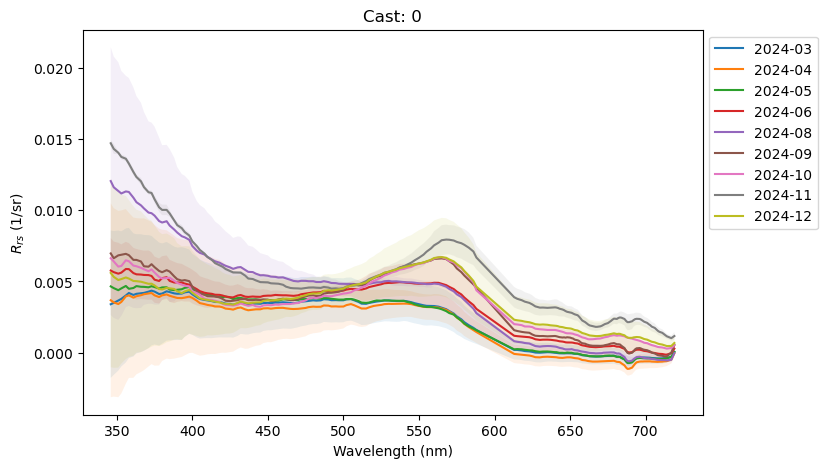

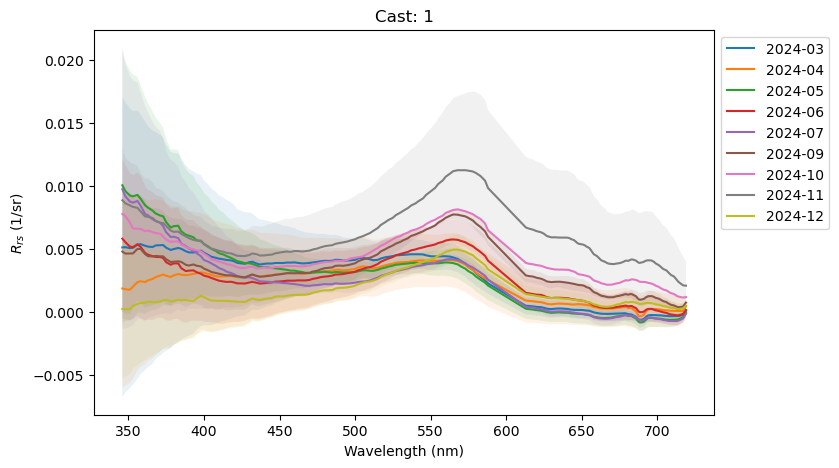

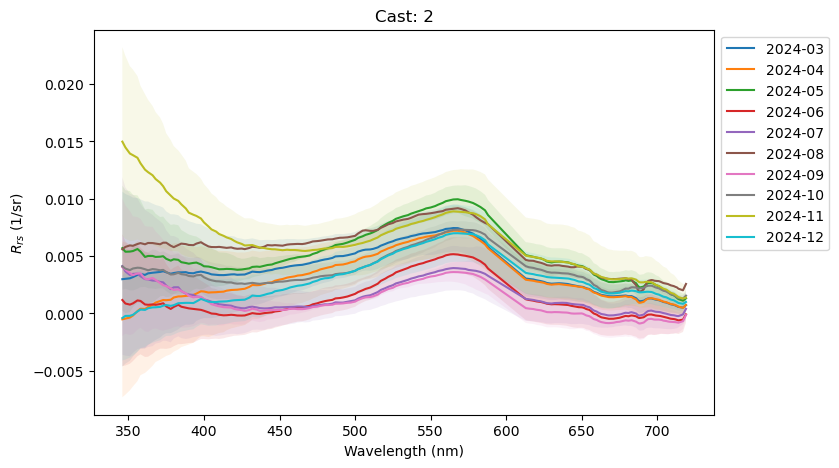

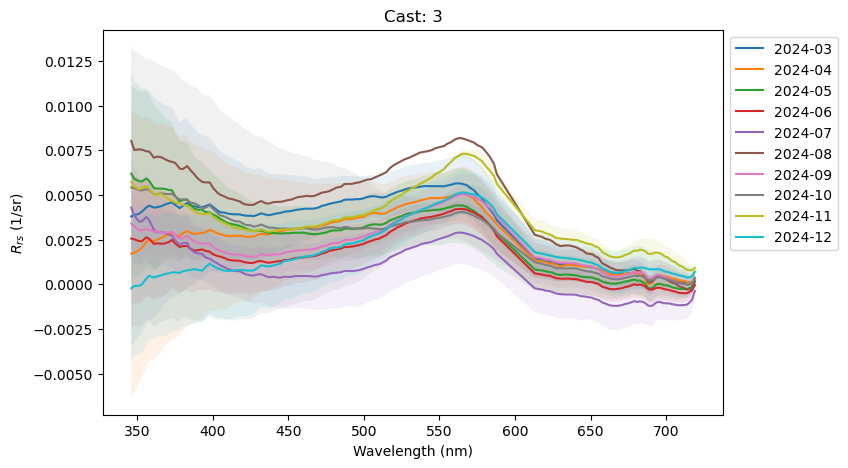

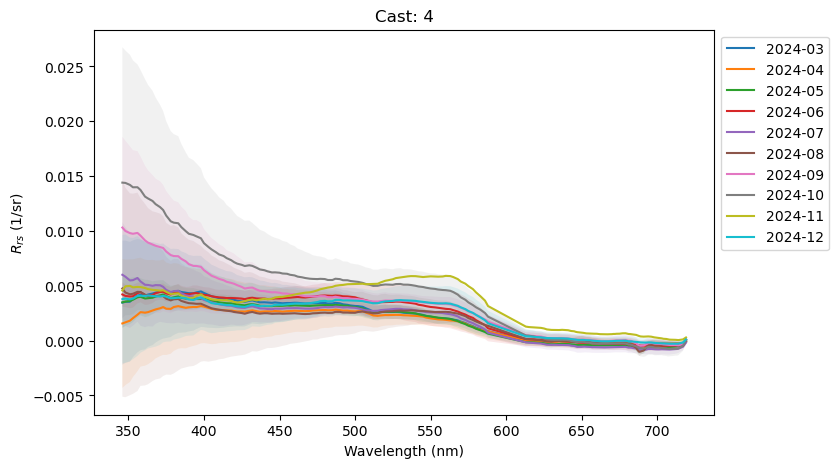

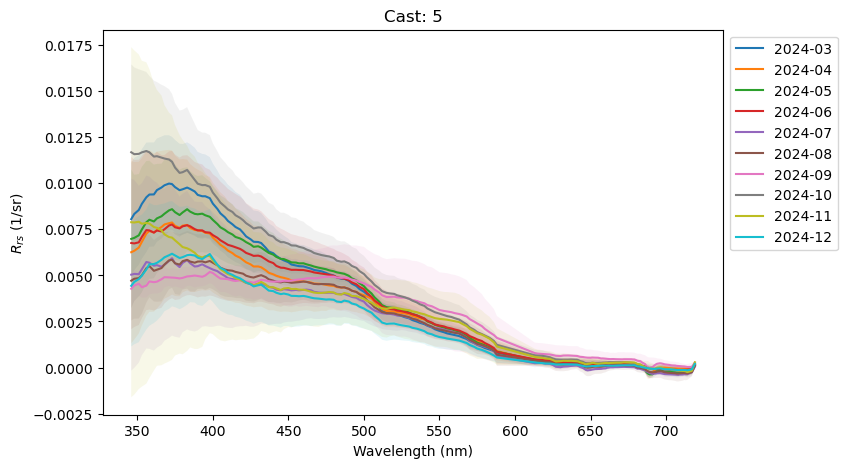

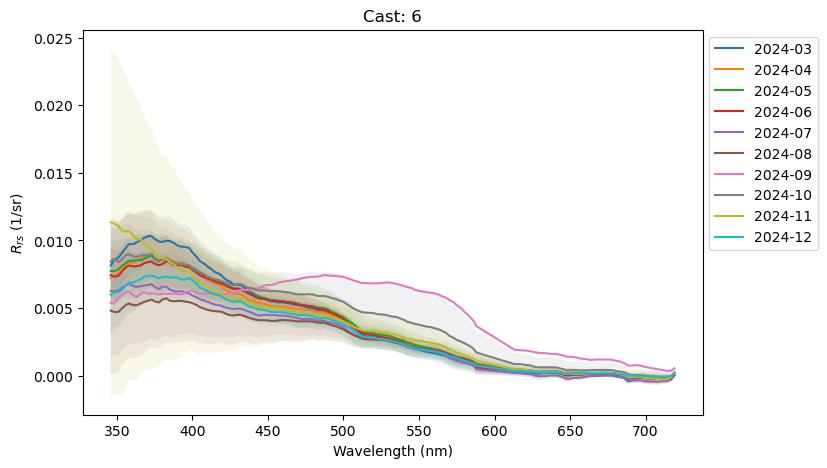

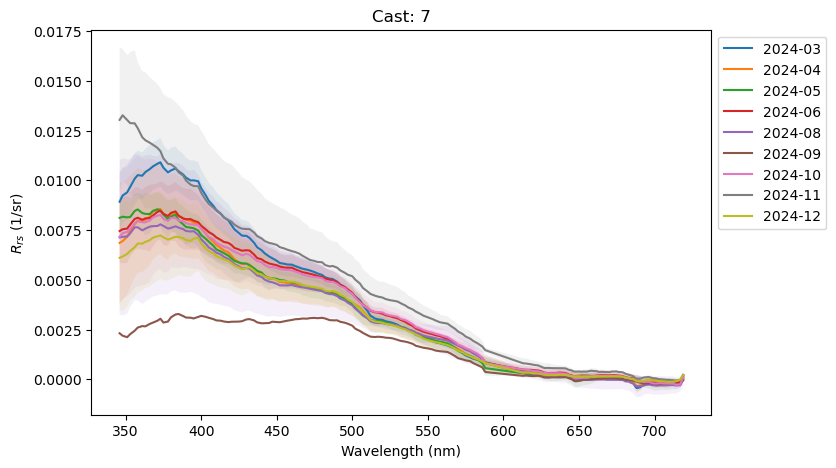

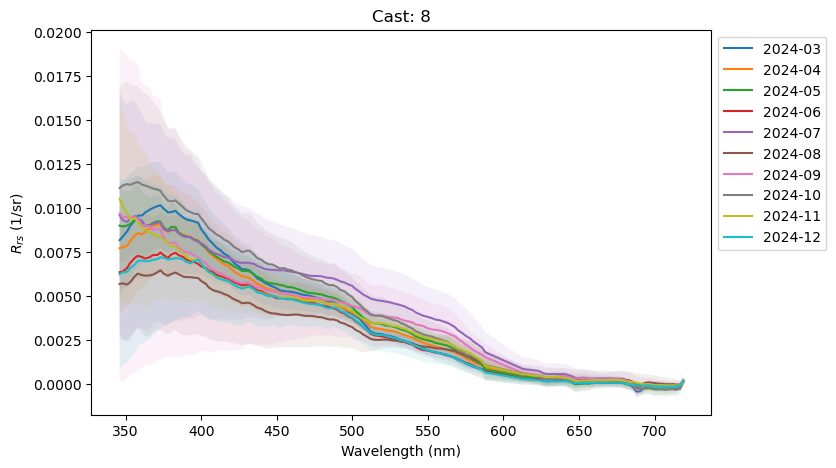

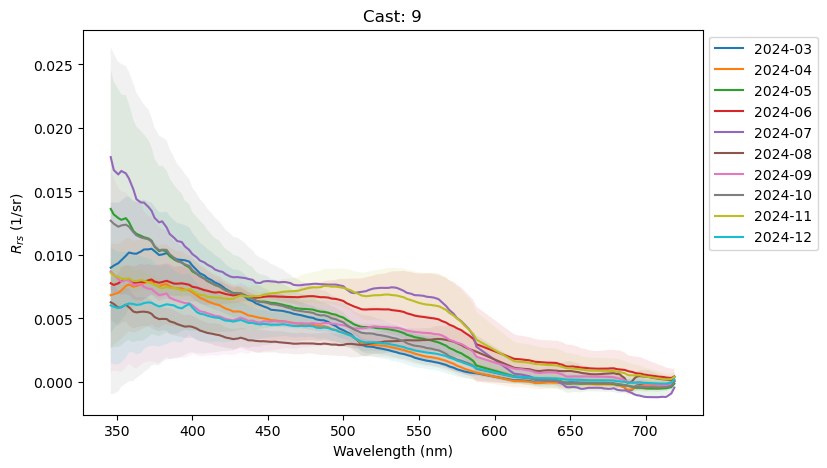

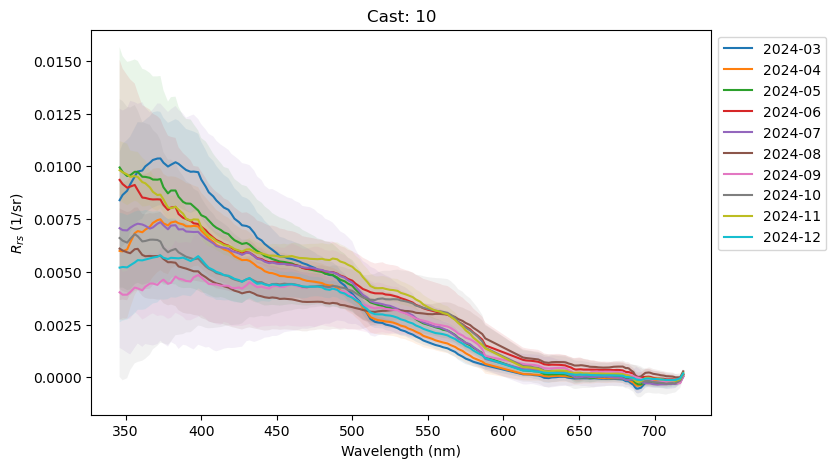

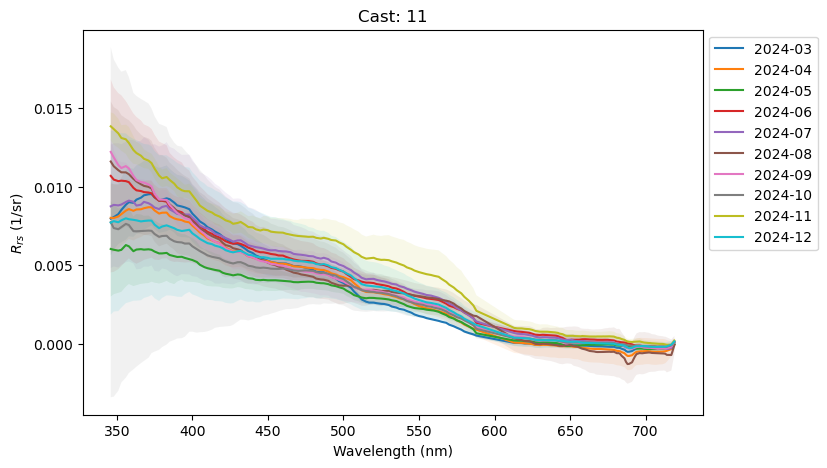

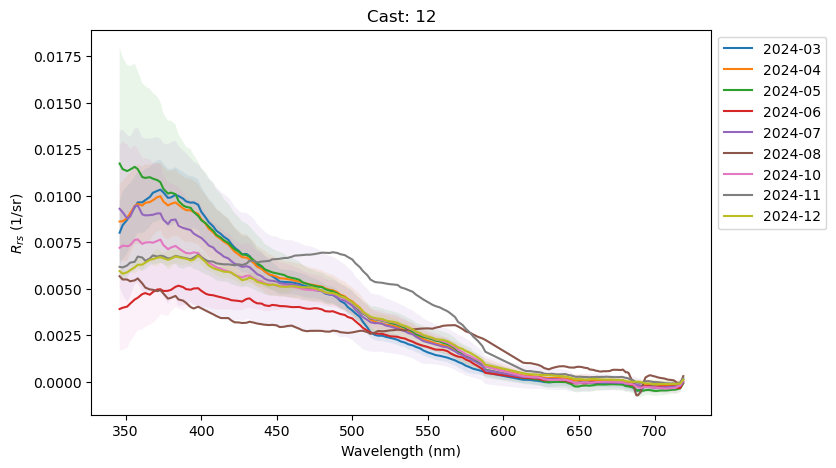

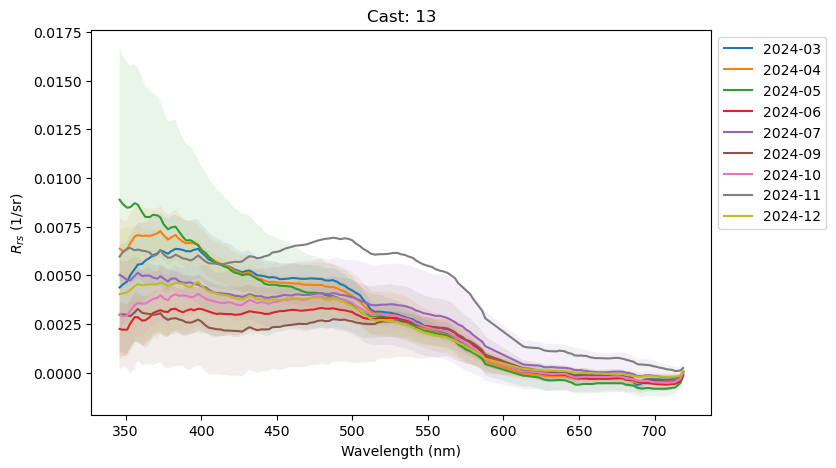

In [4]:
# Group by cast
for cast, c_group in df.groupby('cast'):
    fig, ax = plt.subplots(figsize=(8, 5))

    # Group by month and wavelength, then compute mean and std
    c_group['month'] = c_group['datetime'].dt.to_period('M')  # Extract month
    month_grouped = c_group.groupby(['month', 'wl'])['rrs'].agg(['mean', 'std']).reset_index()

    # Plot each month's mean with shaded std deviation
    for month, d_group in month_grouped.groupby('month'):
        ax.plot(d_group['wl'], d_group['mean'], label=str(month))
        ax.fill_between(d_group['wl'], d_group['mean'] - d_group['std'], 
                        d_group['mean'] + d_group['std'], alpha=0.1)

    # Formatting
    ax.set_title(f'Cast: {cast}')
    ax.set_xlabel('Wavelength (nm)')
    ax.set_ylabel(r'$R_{rs}$ (1/sr)')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.savefig('figures/climatology/monthly_' + str(cast) + '_.png', dpi=600)
    plt.show()

### Group by Week

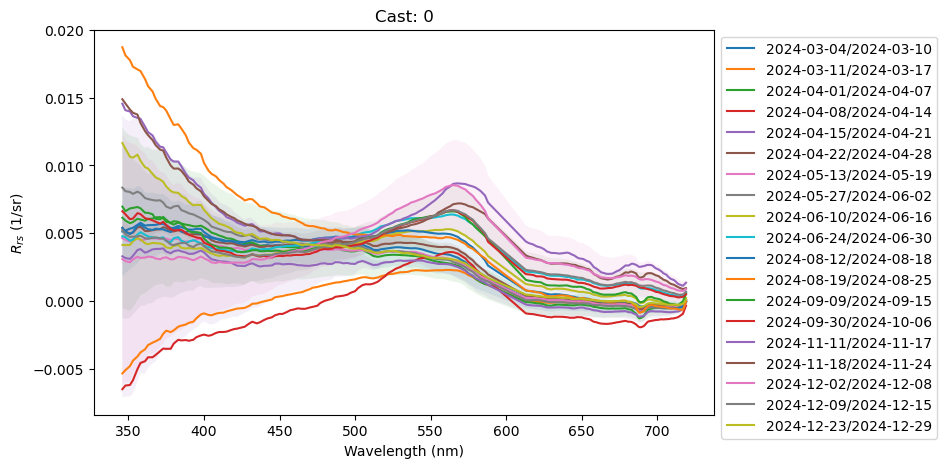

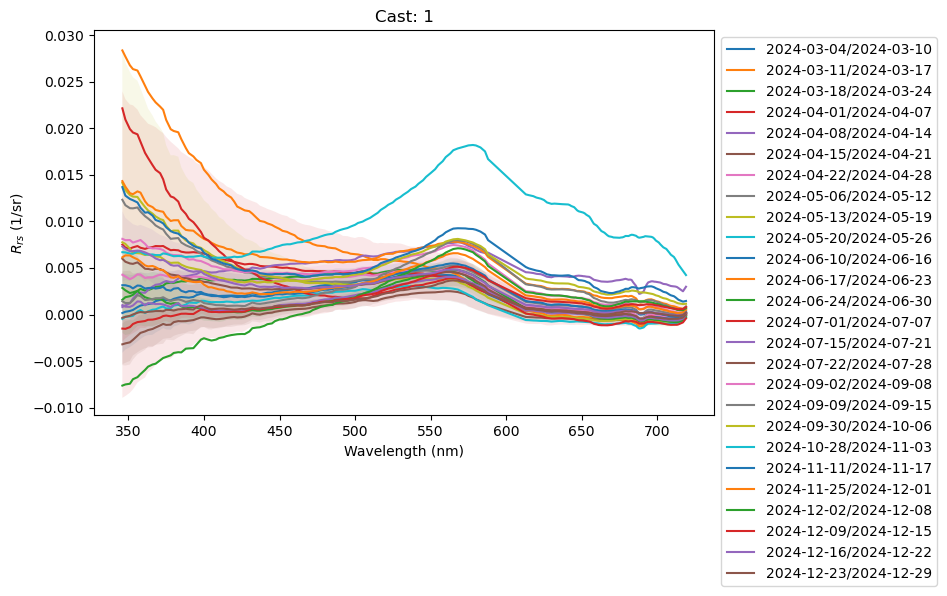

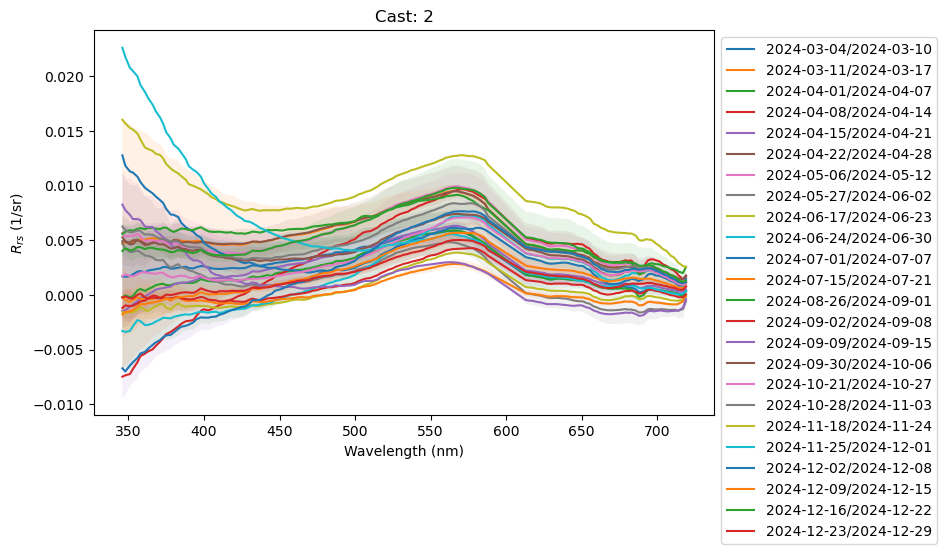

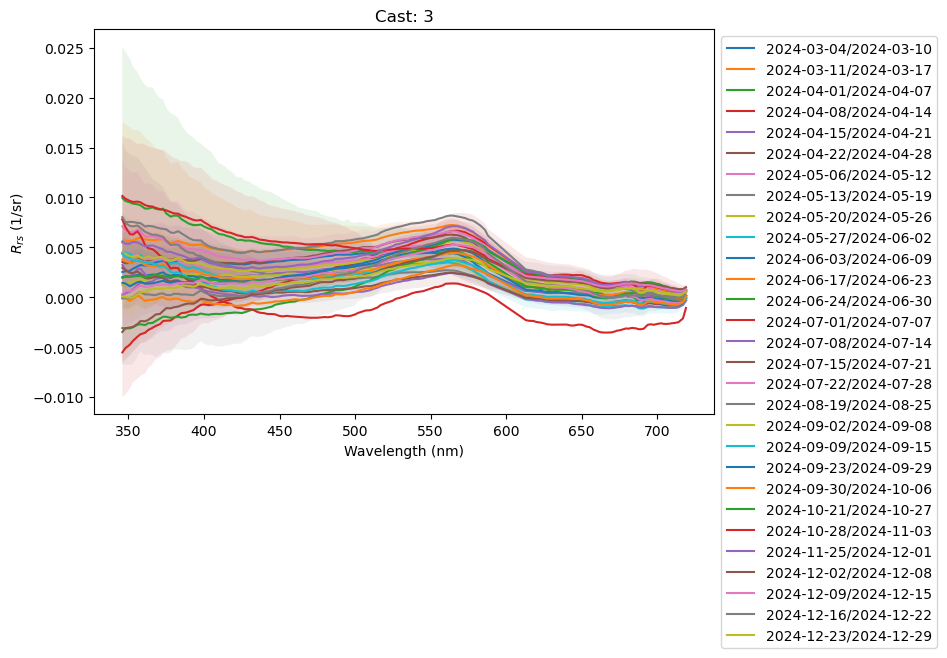

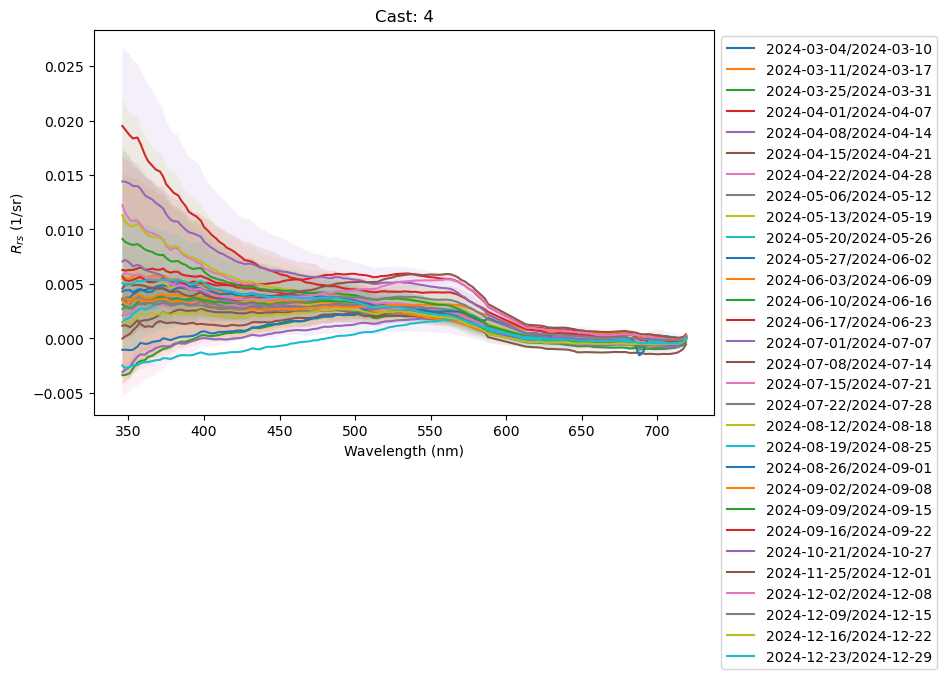

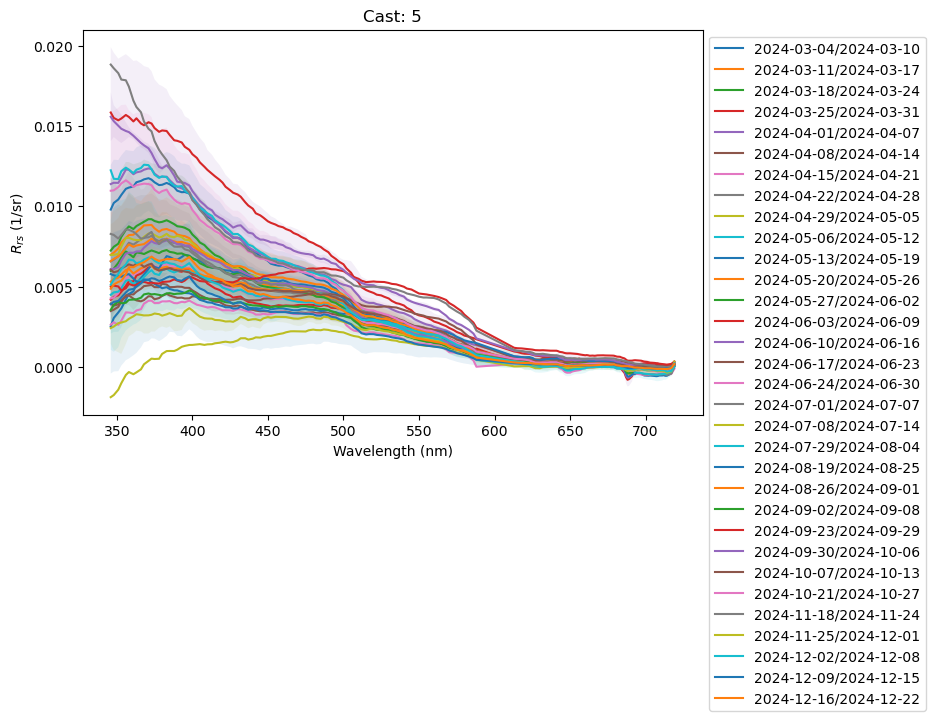

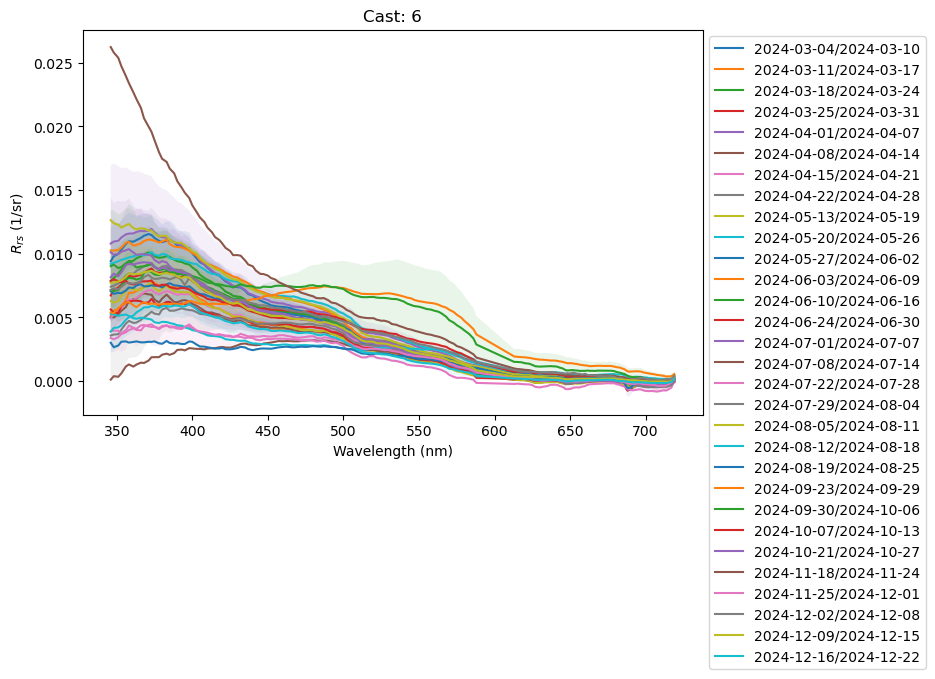

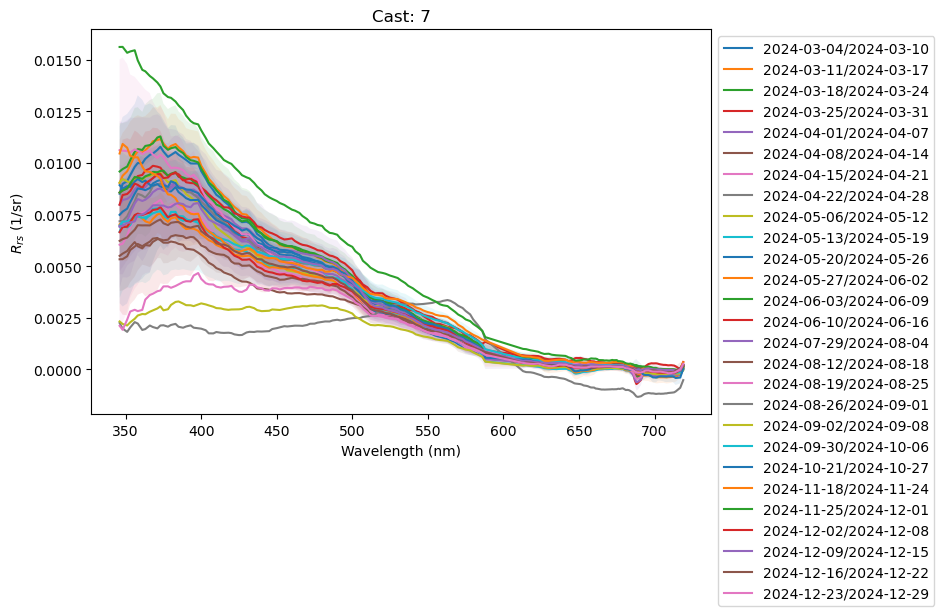

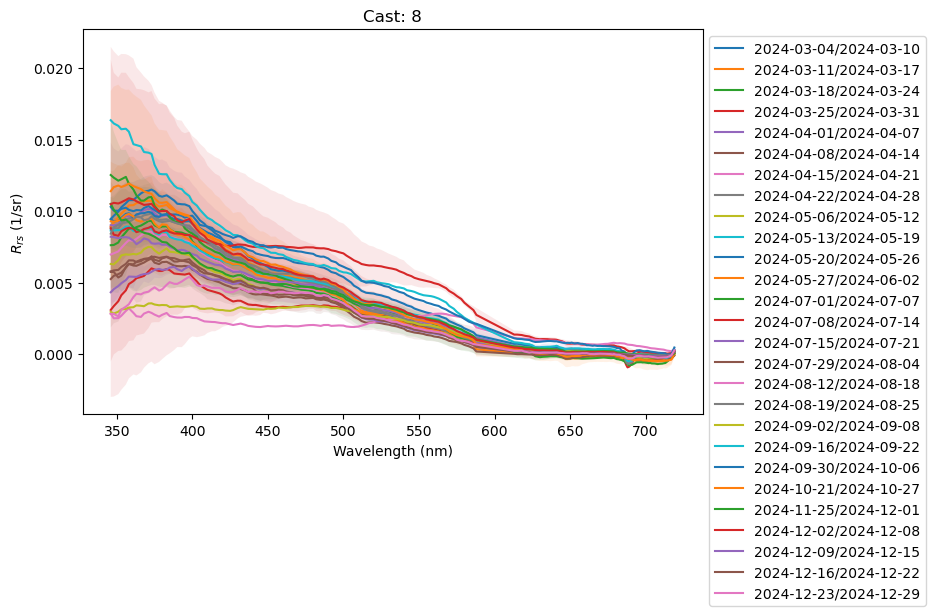

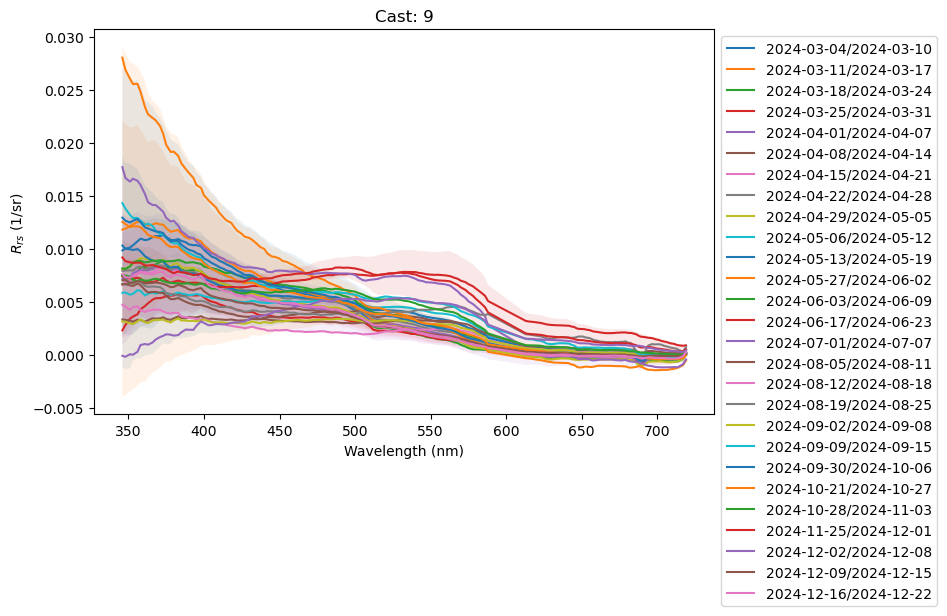

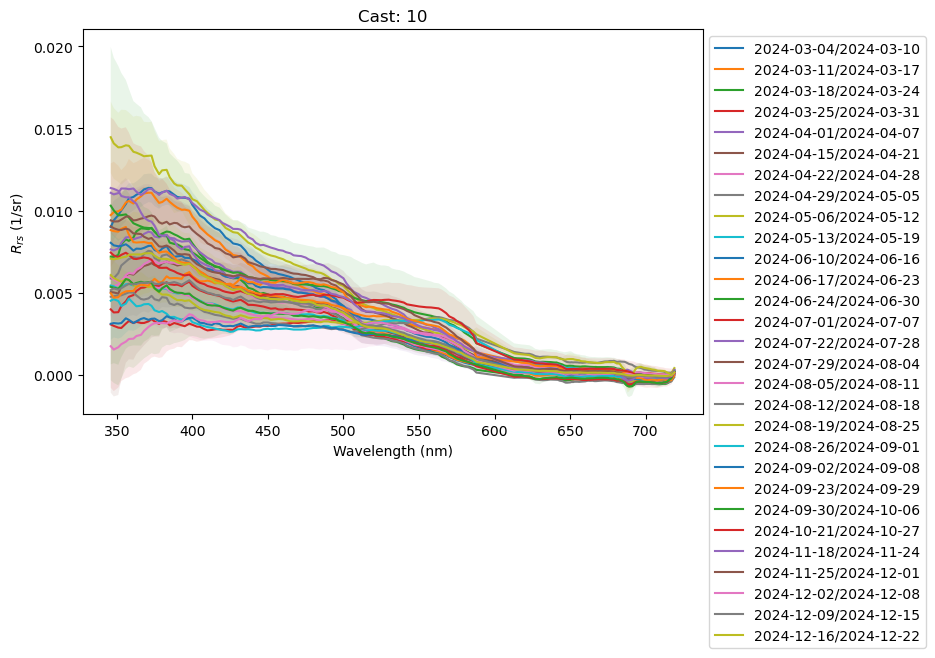

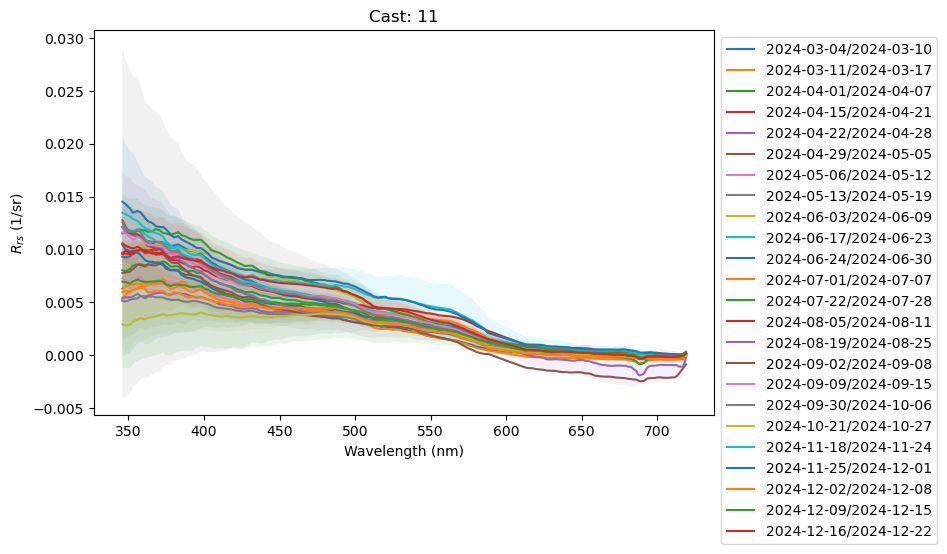

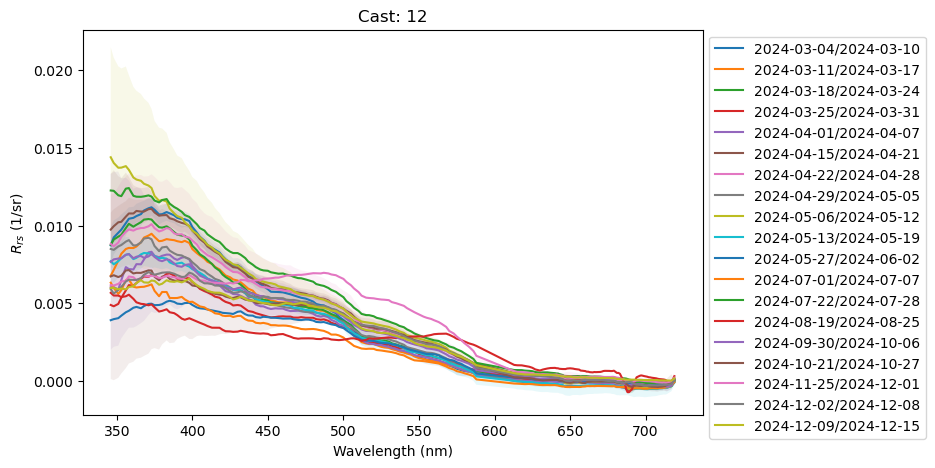

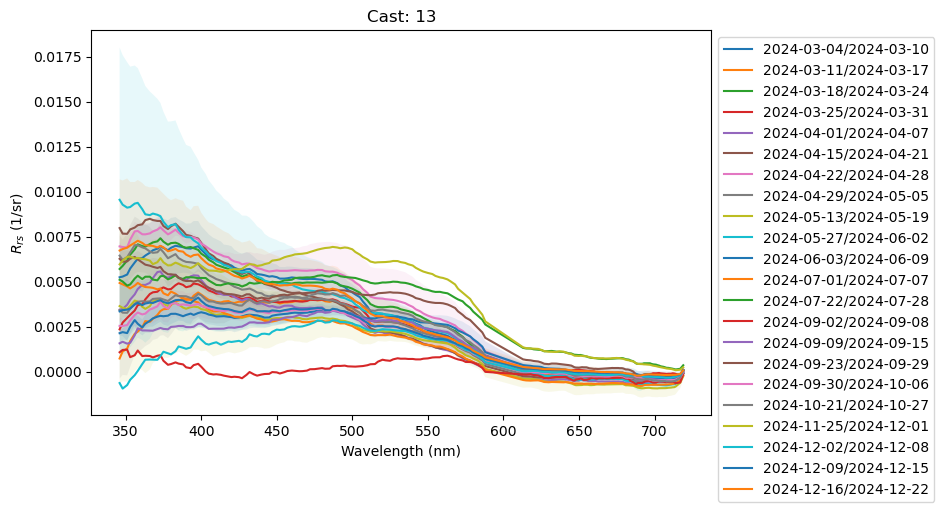

In [5]:
# Group by cast
for cast, c_group in df.groupby('cast'):
    fig, ax = plt.subplots(figsize=(8, 5))

    # Group by month and wavelength, then compute mean and std
    c_group['month'] = c_group['datetime'].dt.to_period('W')  # Extract week
    month_grouped = c_group.groupby(['month', 'wl'])['rrs'].agg(['mean', 'std']).reset_index()

    # Plot each month's mean with shaded std deviation
    for month, d_group in month_grouped.groupby('month'):
        ax.plot(d_group['wl'], d_group['mean'], label=str(month))
        ax.fill_between(d_group['wl'], d_group['mean'] - d_group['std'], 
                        d_group['mean'] + d_group['std'], alpha=0.1)

    # Formatting
    ax.set_title(f'Cast: {cast}')
    ax.set_xlabel('Wavelength (nm)')
    ax.set_ylabel(r'$R_{rs}$ (1/sr)')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.savefig('figures/climatology/weekly_' + str(cast) + '_.png', dpi=600)
    plt.show()

## Look at Individual PACE spectra

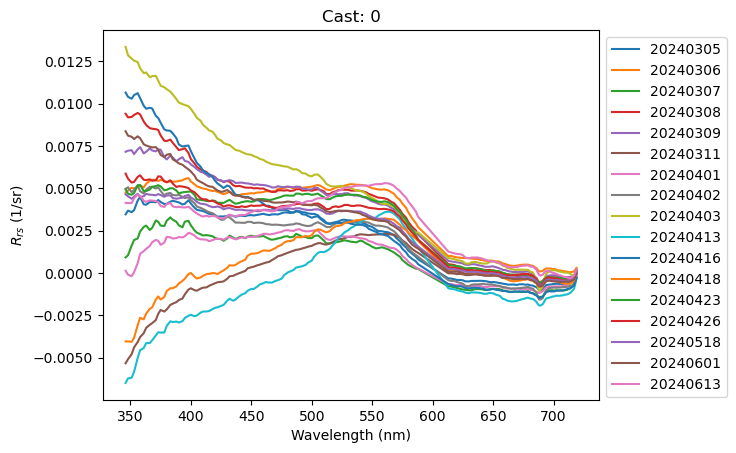

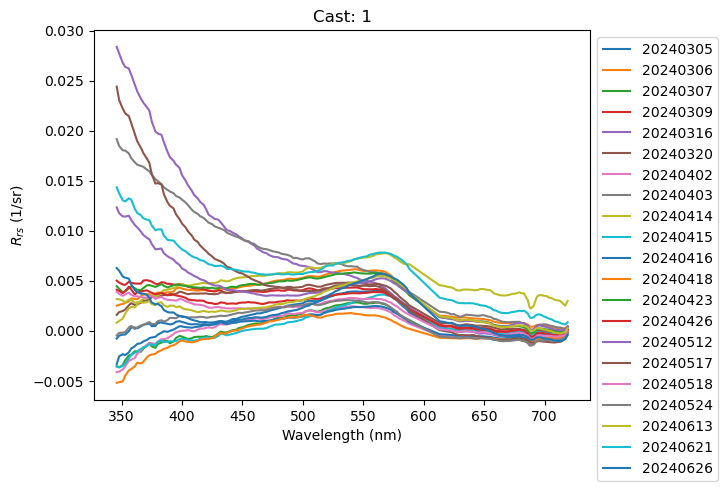

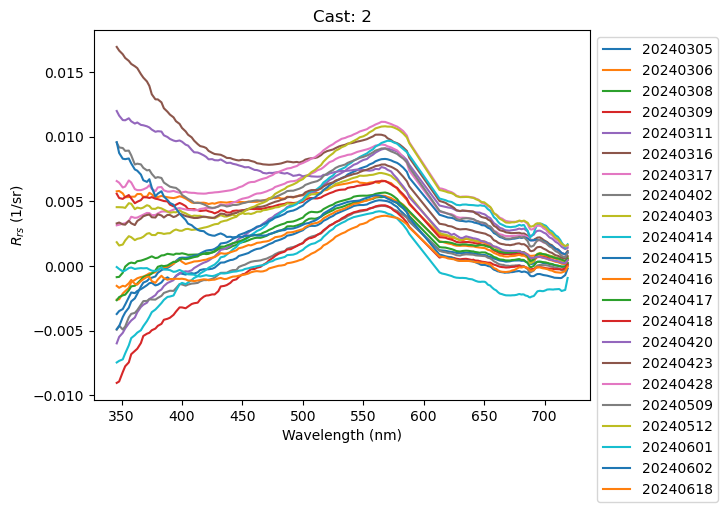

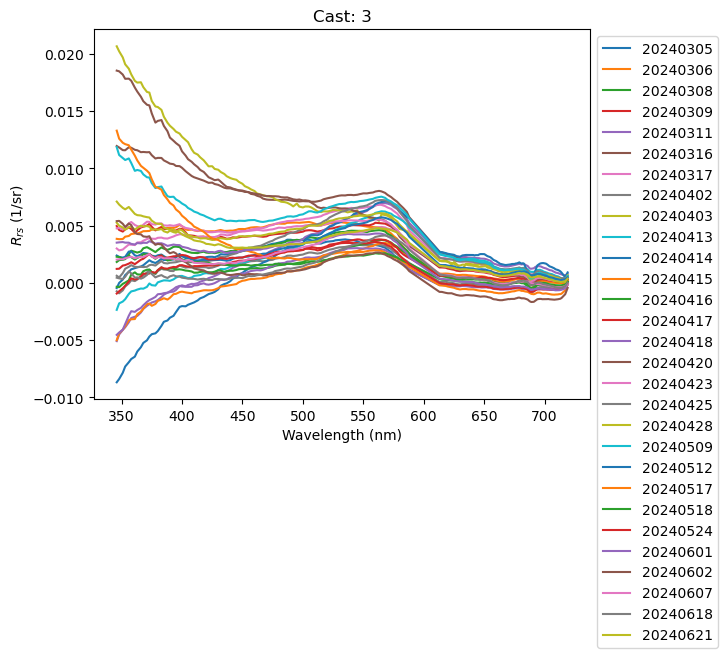

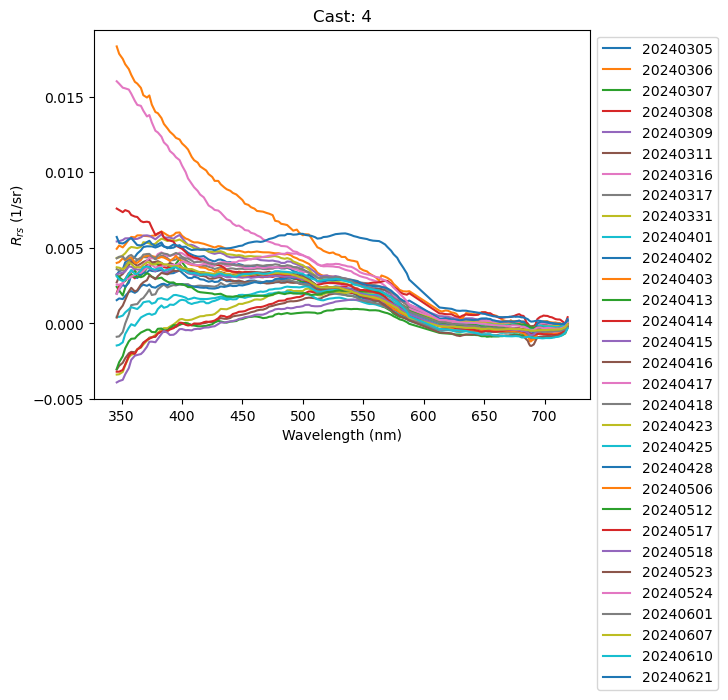

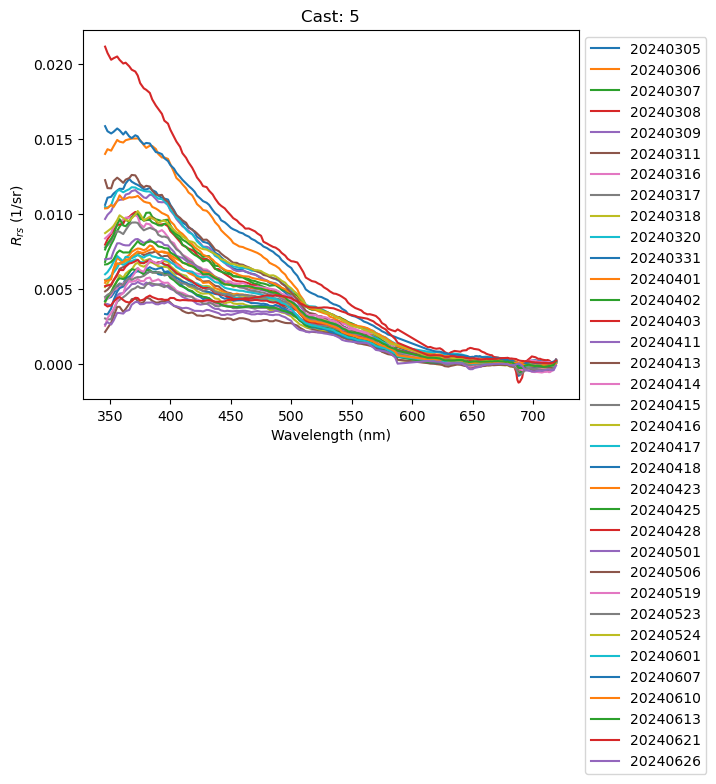

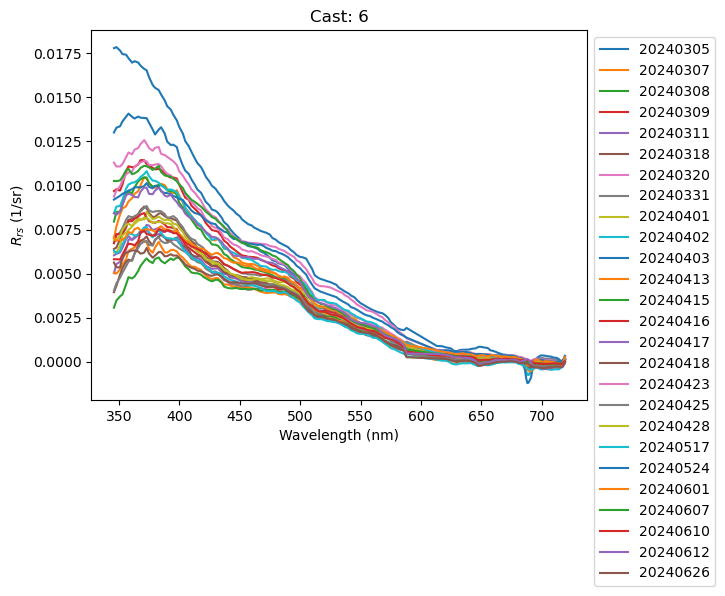

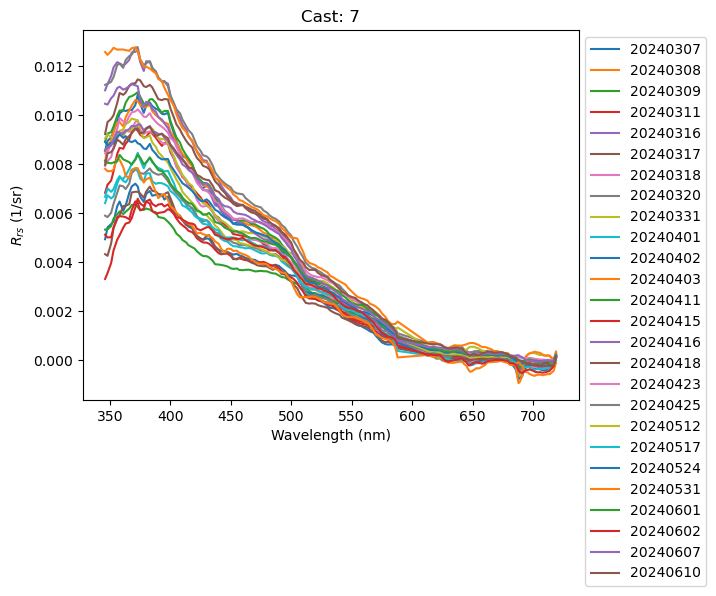

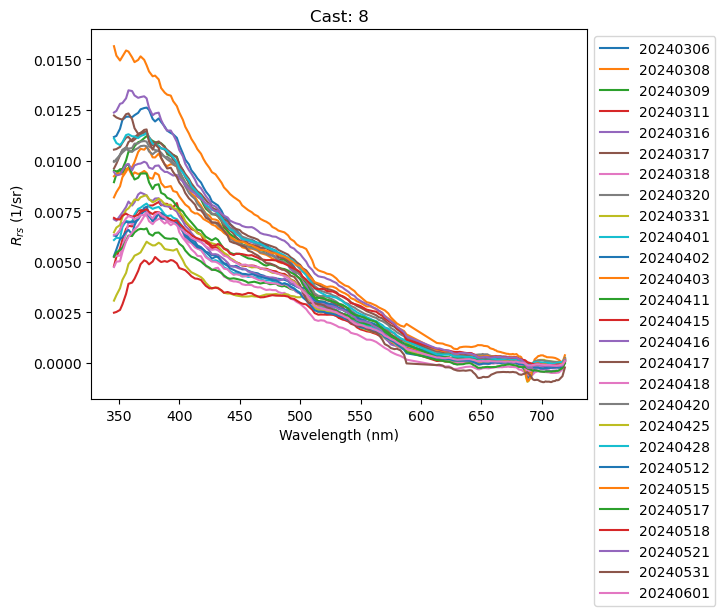

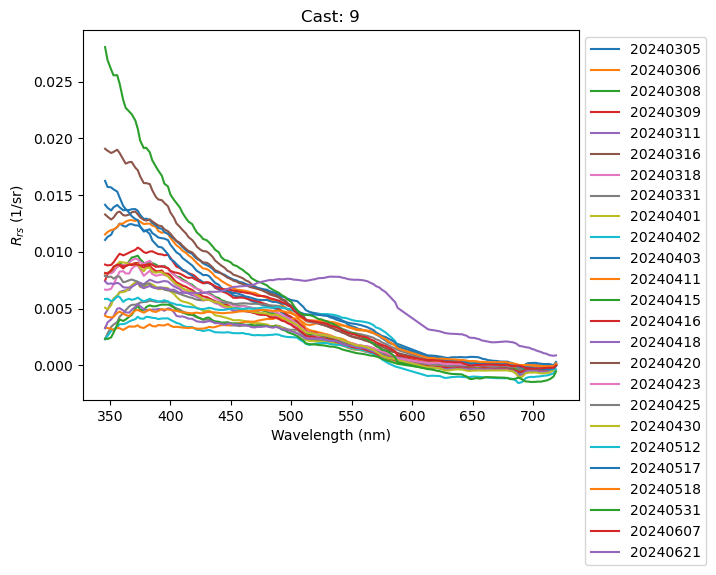

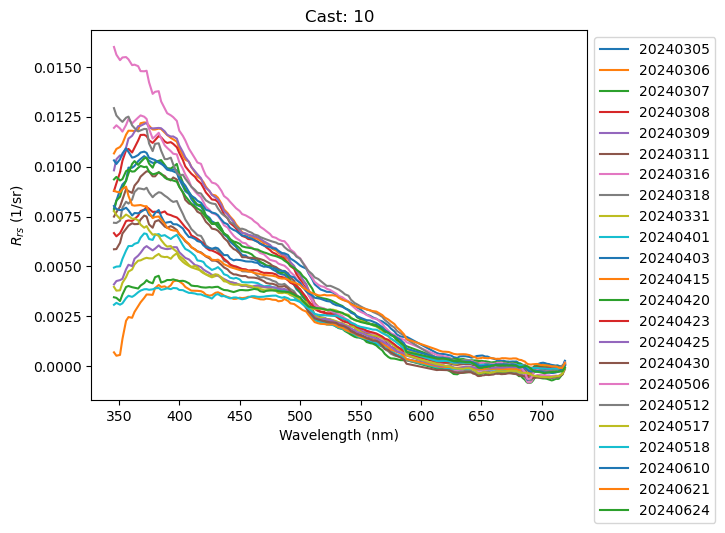

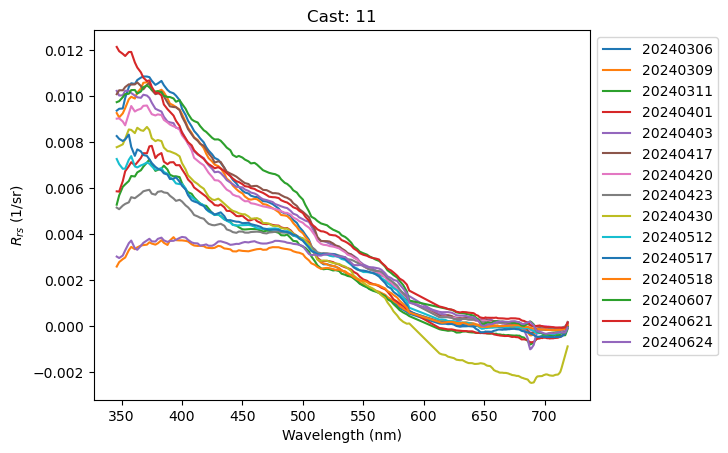

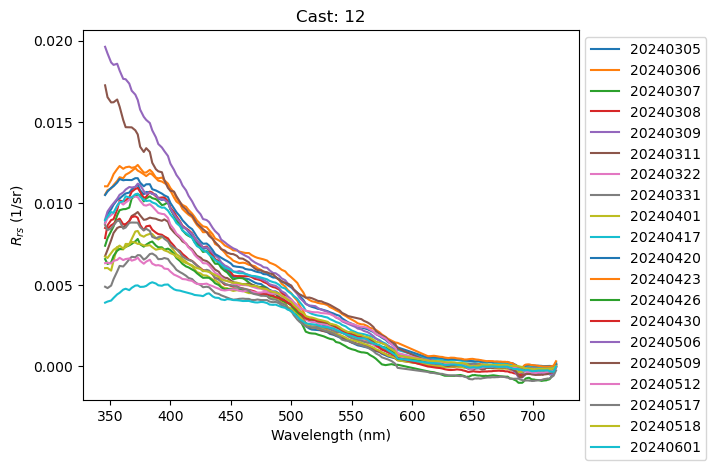

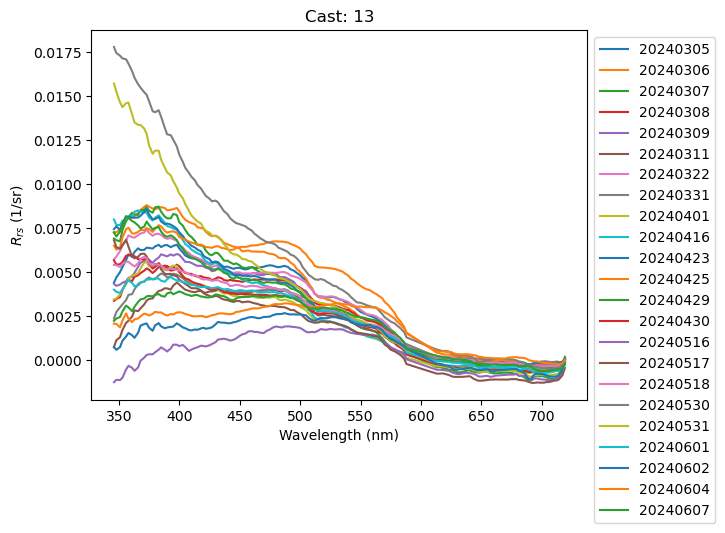

In [91]:
for cast, c_group in df.groupby('cast'):
    fig, ax = plt.subplots(1,1)
    for date, d_group in c_group.groupby('date'):
        ax.plot(d_group['wl'], d_group['rrs'], label=date)
        ax.set_title('Cast: ' + str(cast))
        ax.set_xlabel('Wavelength (nm)')
        ax.set_ylabel('$R_{rs}$ (1/sr)')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))